In [1]:
library(tidyverse)
library(data.table)
library(patchwork)

theme_custom <- theme_classic() +
                theme(## Axis labels
                      axis.text.x = element_text(size=18, family="Econ Sans Cnd light"),
                      axis.text.y = element_text(size=18, family="Econ Sans Cnd light"),
                      ## Title, subtitle, caption, legend
                      plot.title = element_text(size=22, face="bold", family="Econ Sans Cnd bold", 
                                                hjust = 0, vjust = 1, margin = margin(b = 10)),
                      plot.subtitle = element_text(size=18, family="Econ Sans Cnd regular",
                                                   hjust = 0),
                      plot.caption = element_text(size=12, face="bold", family="Econ Sans Cnd light", hjust=0, colour="#6F8793"),
                      legend.position = "top",
                      legend.text = element_text(size=15, hjust=0, vjust=.1),
                      legend.title = element_blank(),
                      ## y-axis lines
                      panel.grid.major.y = element_line(color="#6F8793")
                     )
                  

fig_size <- function(width=22, heigth=8){
    options(repr.plot.width=width, repr.plot.height=heigth)
}
fig_size()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘data.table’




The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year




The following objects are masked from ‘package:dplyr’:

    between, first, last




The following object is masked from ‘package:purrr’:

    transpose




# Details about Data
#### 1. Each country appears only once. For each country's record, associated suicide rates for sexes are provided for the years 2019-2021.
#### 2. NA values are present for some countries' statistics in the year 2019

In [2]:
data <- read_csv("/kaggle/input/global-suicide-statistics/suicide-rate-by-country-2024.csv")
head(data, 5)
spec(data)

Rows: 204 Columns: 10


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): country
dbl (9): SuicideRate_BothSexes_RatePer100k_2021, SuicideRate_Male_RatePer100...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


country,SuicideRate_BothSexes_RatePer100k_2021,SuicideRate_Male_RatePer100k_2021,SuicideRate_Female_RatePer100k_2021,SuicideRate_BothSexes_RatePer100k_2020,SuicideRate_Male_RatePer100k_2020,SuicideRate_Female_RatePer100k_2020,SuicideRate_BothSexes_RatePer100k_2019,SuicideRate_Male_RatePer100k_2019,SuicideRate_Female_RatePer100k_2019
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
India,13.33,15.70,10.85,13.28,15.70,10.73,12.7,14.1,11.1
China,9.17,10.64,7.63,9.04,10.52,7.50,8.1,9.8,6.2
United States,15.25,24.13,6.66,15.38,24.33,6.73,16.1,25.0,7.5
Indonesia,1.64,2.21,1.05,1.66,2.23,1.07,2.4,3.7,1.1
Pakistan,5.82,8.46,3.05,5.89,8.54,3.10,8.9,13.3,4.3


cols(
  country = col_character(),
  SuicideRate_BothSexes_RatePer100k_2021 = col_double(),
  SuicideRate_Male_RatePer100k_2021 = col_double(),
  SuicideRate_Female_RatePer100k_2021 = col_double(),
  SuicideRate_BothSexes_RatePer100k_2020 = col_double(),
  SuicideRate_Male_RatePer100k_2020 = col_double(),
  SuicideRate_Female_RatePer100k_2020 = col_double(),
  SuicideRate_BothSexes_RatePer100k_2019 = col_double(),
  SuicideRate_Male_RatePer100k_2019 = col_double(),
  SuicideRate_Female_RatePer100k_2019 = col_double()
)

In [3]:
data %>%
    group_by(country) %>%
    summarise("count" = n()) %>%
    arrange(desc(country))

country,count
<chr>,<int>
Zimbabwe,1
Zambia,1
Yemen,1
Vietnam,1
Venezuela,1
Vanuatu,1
Uzbekistan,1
Uruguay,1
United States Virgin Islands,1


In [4]:
data %>%
    is.na() %>%
    apply(2, sum) %>%
    data.frame() %>%
    rownames_to_column() %>%
    rename("feature" = "rowname",
           "NA_count" = ".") %>%
    arrange(desc(NA_count))

feature,NA_count
<chr>,<int>
SuicideRate_Male_RatePer100k_2019,22
SuicideRate_BothSexes_RatePer100k_2019,21
SuicideRate_Female_RatePer100k_2019,21
country,0
SuicideRate_BothSexes_RatePer100k_2021,0
SuicideRate_Male_RatePer100k_2021,0
SuicideRate_Female_RatePer100k_2021,0
SuicideRate_BothSexes_RatePer100k_2020,0
SuicideRate_Male_RatePer100k_2020,0


In [5]:
features <- c("country",
              "SuicideRate_Male_RatePer100k_2019", 
              "SuicideRate_Female_RatePer100k_2019",
              "SuicideRate_BothSexes_RatePer100k_2019"
             )
data %>%
    filter(is.na(SuicideRate_Male_RatePer100k_2019)) %>%
    select(all_of(features))

country,SuicideRate_Male_RatePer100k_2019,SuicideRate_Female_RatePer100k_2019,SuicideRate_BothSexes_RatePer100k_2019
<chr>,<dbl>,<dbl>,<dbl>
Taiwan,NA,NA,NA
Palestine,NA,NA,NA
Puerto Rico,NA,NA,NA
Guam,NA,NA,NA
Antigua and Barbuda,NA,0.8,0.4
United States Virgin Islands,NA,NA,NA
Andorra,NA,NA,NA
Dominica,NA,NA,NA
Bermuda,NA,NA,NA


In [6]:
long_data <- 
    data %>%
    ## Changes shape of dataframe to long-dataframe
    pivot_longer(cols=2:10,
                 names_to="feature",
                 values_to="suicide_rate") %>%
    ## Extracts year from each value in 'feature'
    ## Strips year suffix from features
    mutate("year" = gsub(".*_(\\d{4})$", "\\1", feature),
           year = as.numeric(year),
           feature = gsub("_\\d{4}$", "", feature)
          )

head(long_data, 12)

country,feature,suicide_rate,year
<chr>,<chr>,<dbl>,<dbl>
India,SuicideRate_BothSexes_RatePer100k,13.33,2021
India,SuicideRate_Male_RatePer100k,15.70,2021
India,SuicideRate_Female_RatePer100k,10.85,2021
India,SuicideRate_BothSexes_RatePer100k,13.28,2020
India,SuicideRate_Male_RatePer100k,15.70,2020
India,SuicideRate_Female_RatePer100k,10.73,2020
India,SuicideRate_BothSexes_RatePer100k,12.70,2019
India,SuicideRate_Male_RatePer100k,14.10,2019
India,SuicideRate_Female_RatePer100k,11.10,2019


# Between the top countries, how has the suicide rate for males change with time? 

In [7]:
topCountries <- c("India", "China", "United States", "United Kingdom", "France",
                  "Italy", "Japan", "Germany", "Spain", "Australia")

topCountries_data <-
    long_data %>%
    filter(country %in% topCountries)

head(topCountries_data, 12)

country,feature,suicide_rate,year
<chr>,<chr>,<dbl>,<dbl>
India,SuicideRate_BothSexes_RatePer100k,13.33,2021
India,SuicideRate_Male_RatePer100k,15.70,2021
India,SuicideRate_Female_RatePer100k,10.85,2021
India,SuicideRate_BothSexes_RatePer100k,13.28,2020
India,SuicideRate_Male_RatePer100k,15.70,2020
India,SuicideRate_Female_RatePer100k,10.73,2020
India,SuicideRate_BothSexes_RatePer100k,12.70,2019
India,SuicideRate_Male_RatePer100k,14.10,2019
India,SuicideRate_Female_RatePer100k,11.10,2019


In [8]:
topCountries_data %>%
    group_by(country) %>%
    summarise("count"=n())

country,count
<chr>,<int>
Australia,9
China,9
France,9
Germany,9
India,9
Italy,9
Japan,9
Spain,9
United Kingdom,9


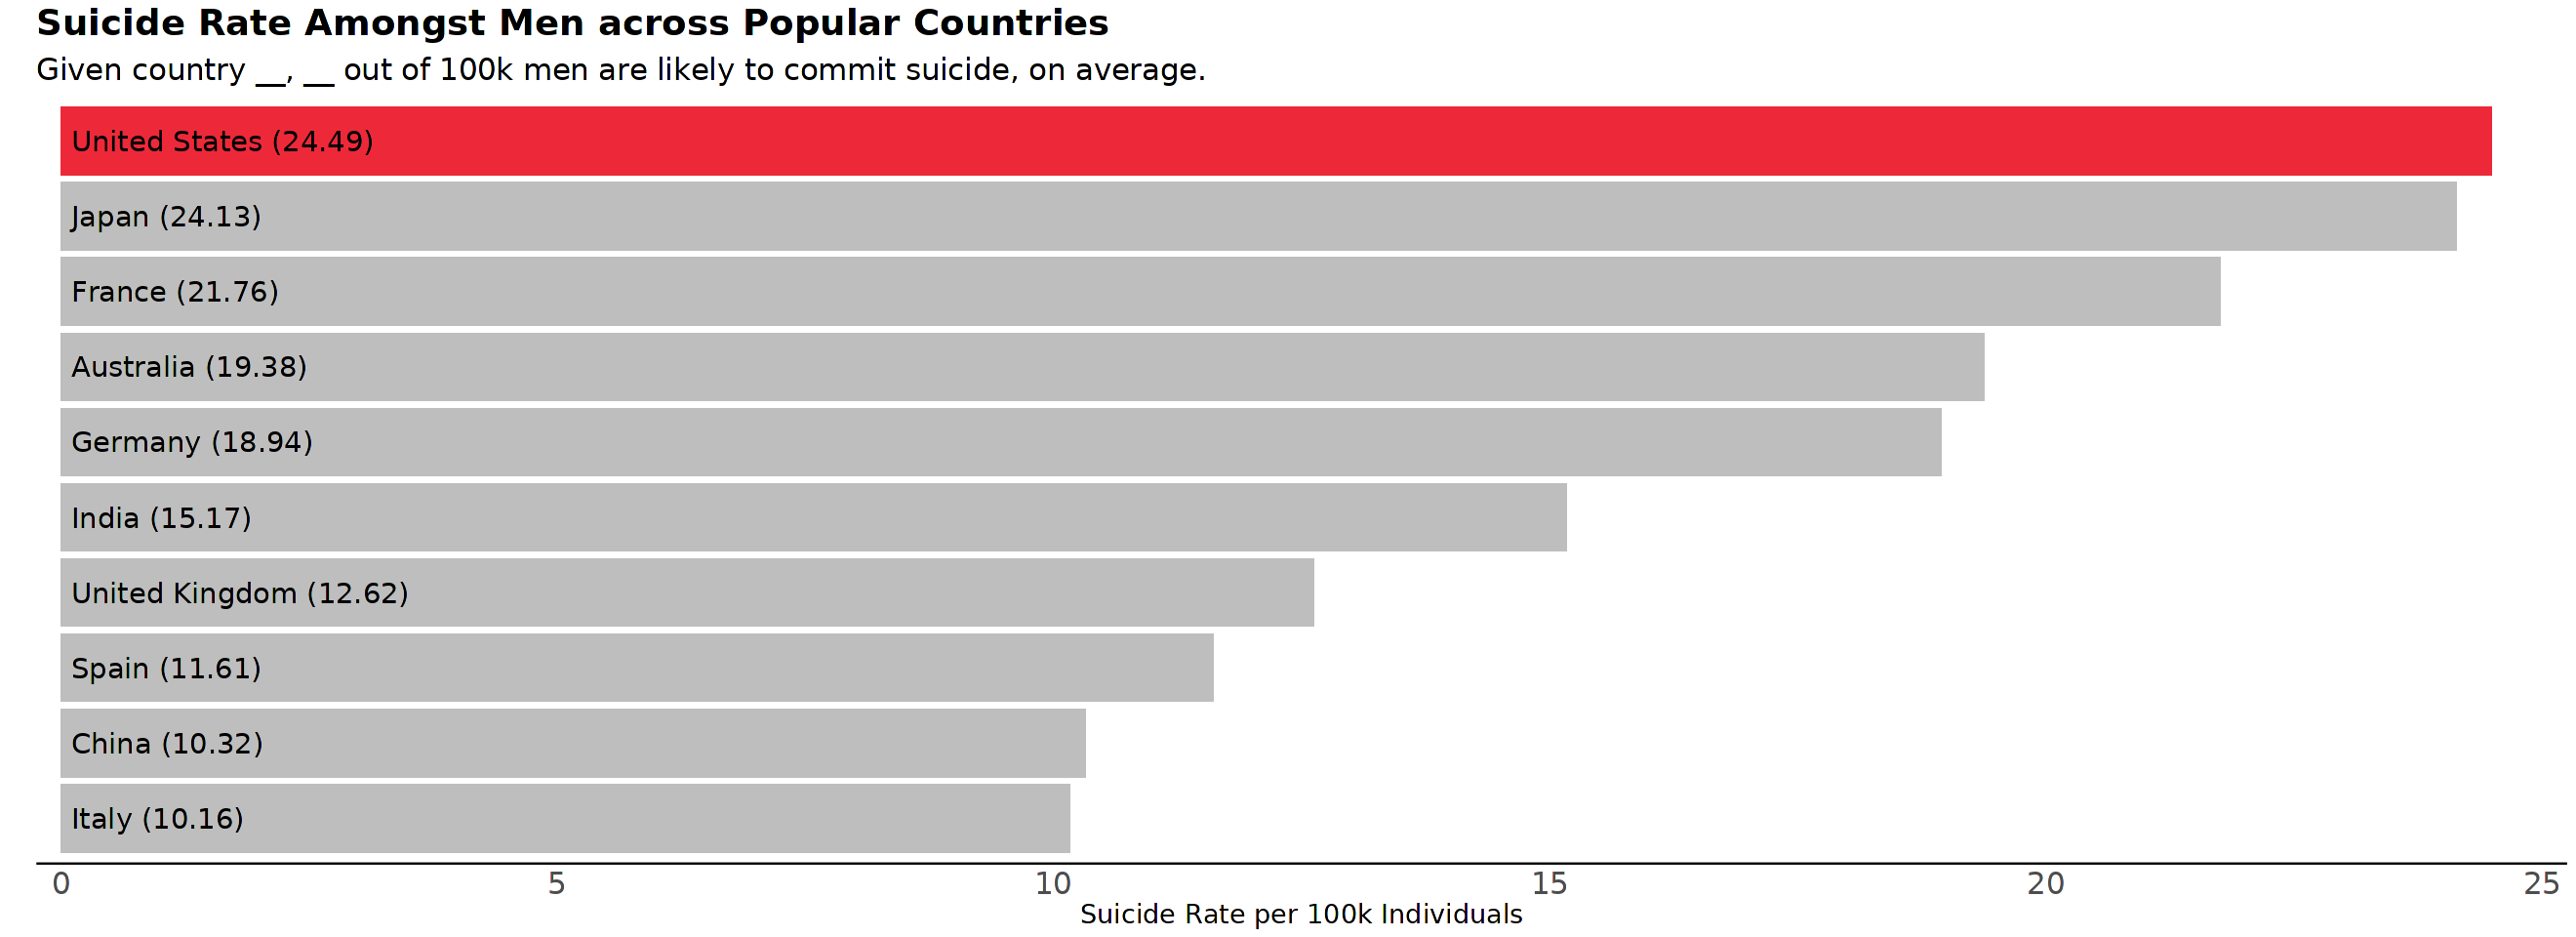

In [9]:
## Calculates average suicide rate for each country (horizontal bar chart)
subtitle <- "Given country __, __ out of 100k men are likely to commit suicide, on average."

fig_size()

topCountries_data %>%
    filter(feature=="SuicideRate_Male_RatePer100k") %>%
    group_by(country) %>%
    summarise("avg_suicide_rate_male_per100k" = mean(suicide_rate)) %>%
    arrange(desc(avg_suicide_rate_male_per100k)) %>%
    mutate(suicide_rate_char = round(avg_suicide_rate_male_per100k, 2),
           suicide_rate_char = as.character(suicide_rate_char),
           "country_rate" = paste(country, " (", suicide_rate_char , ")", sep="")) %>%
    mutate(country_rate = fct_reorder(country_rate, avg_suicide_rate_male_per100k)) %>%
    mutate(color = ifelse(country=="United States", "Y", "N")) %>%

    # Graphing
    ggplot(aes(x=avg_suicide_rate_male_per100k, y=country_rate, fill=color)) +
    geom_bar(stat="identity") +
    theme_custom +
    labs(title="Suicide Rate Amongst Men across Popular Countries",
         subtitle=subtitle,
         x="Suicide Rate per 100k Individuals",
         y=""
        ) +

    ## Customizations
    theme(panel.grid.major.y = element_blank(),
          axis.line.y = element_blank(),
          axis.ticks.y = element_blank(),
          axis.ticks.x = element_blank(),
          axis.title.x = element_text(size=16, family="Econ Sans Cnd light"),
          legend.position = "none",
          axis.text.y = element_blank()
         ) +
    scale_fill_manual(values=c("Y" = "#ED2939",
                               "N" = "gray")) +
    geom_text(aes(x=0, y=country_rate, label=country_rate),
              hjust=0,
              nudge_x=.1,
              color="black",
              family = "Econ Sans Cnd regular",
              size = 6
              ) +
    scale_x_continuous(expand = c(0,0.25), lim=c(0,25))

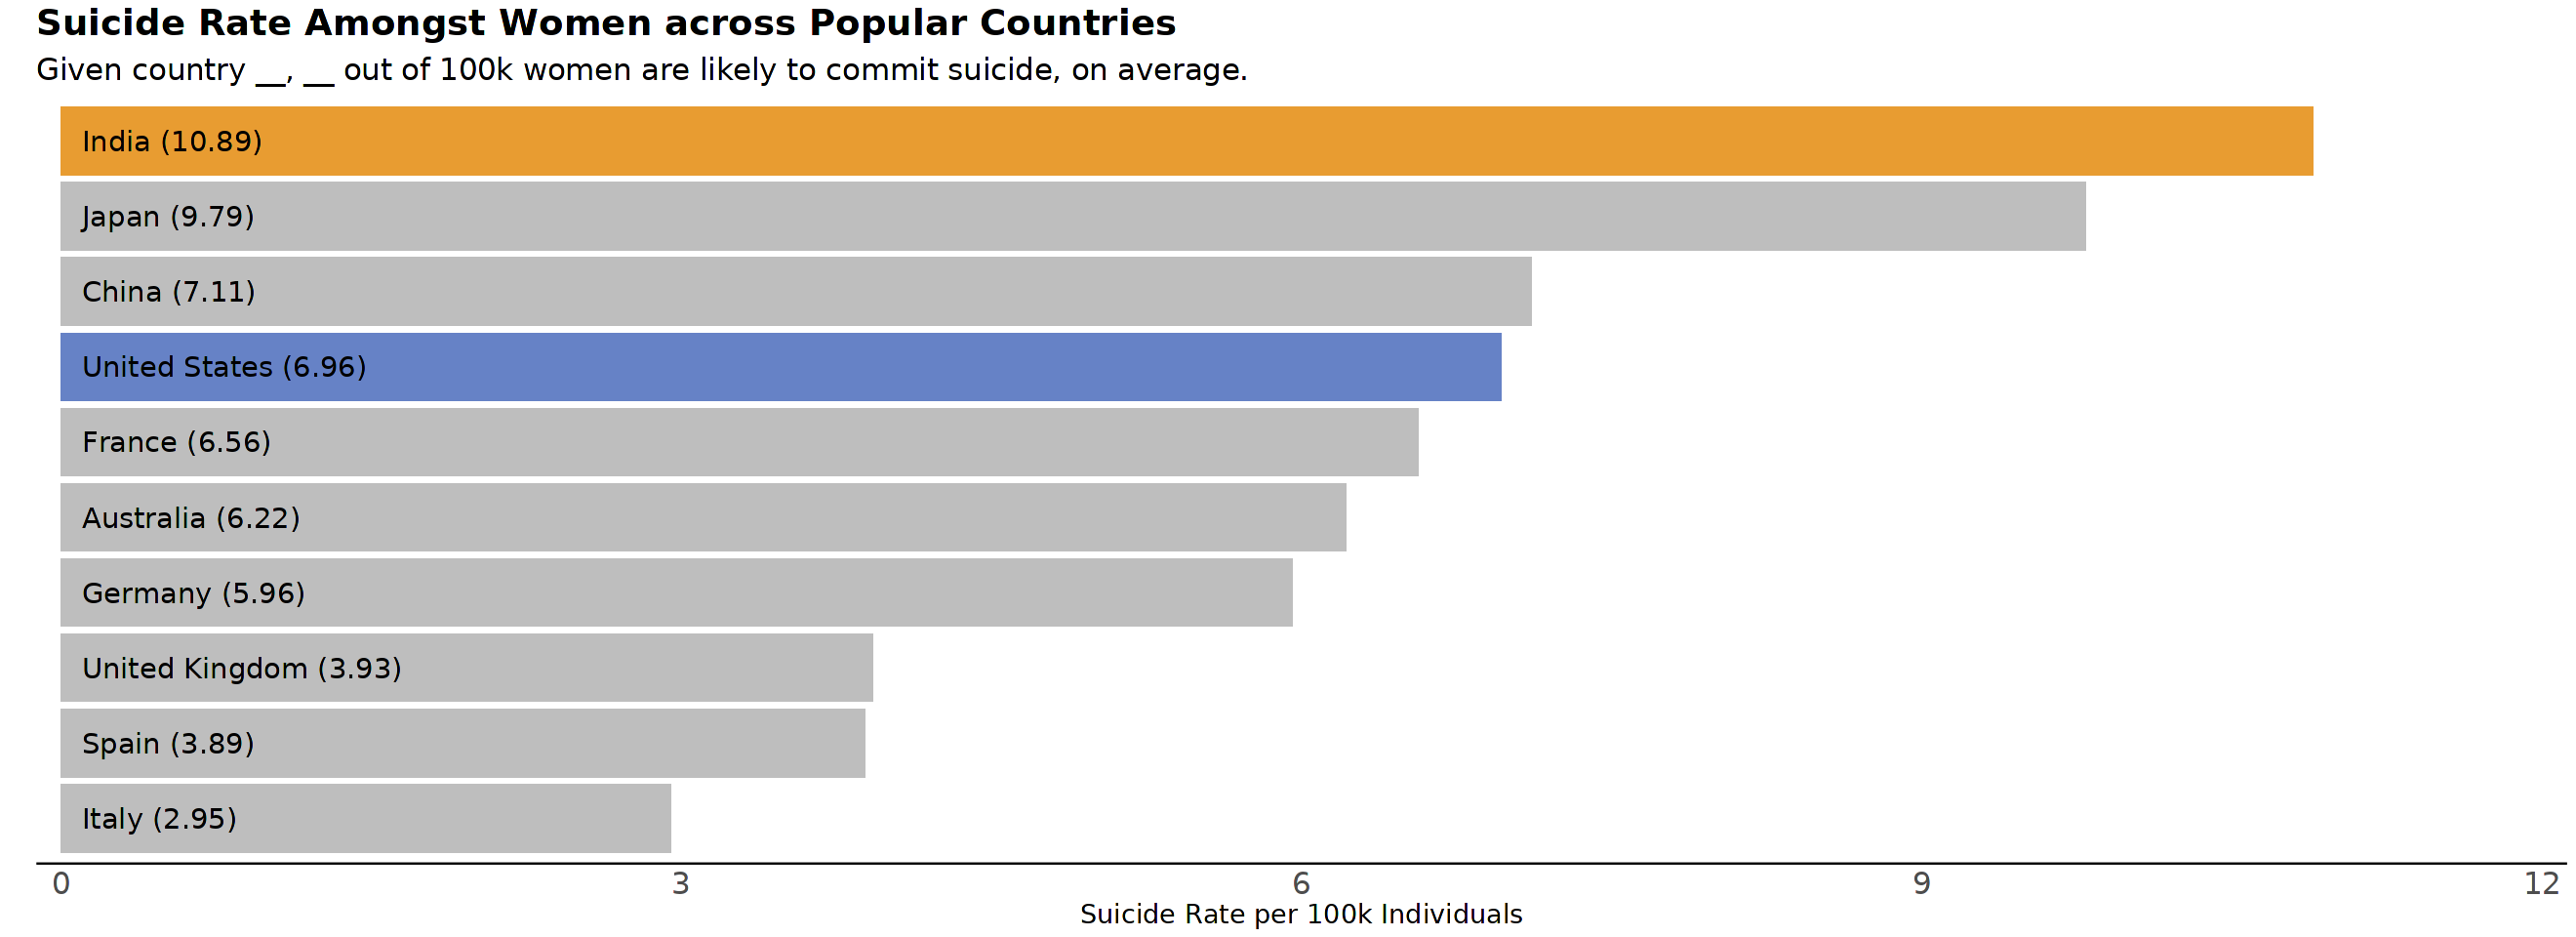

In [10]:
## Calculates average suicide rate for each country (horizontal bar chart)
subtitle <- "Given country __, __ out of 100k women are likely to commit suicide, on average."


topCountries_data %>%
    filter(feature=="SuicideRate_Female_RatePer100k") %>%
    group_by(country) %>%
    summarise("avg_suicide_rate_female_per100k" = mean(suicide_rate)) %>%
    arrange(desc(avg_suicide_rate_female_per100k)) %>%
    mutate(suicide_rate_char = round(avg_suicide_rate_female_per100k, 2),
           suicide_rate_char = as.character(suicide_rate_char),
           "country_rate" = paste(country, " (", suicide_rate_char , ")", sep="")) %>%
    mutate(country_rate = fct_reorder(country_rate, avg_suicide_rate_female_per100k)) %>%
    mutate(color = case_when(country=="India" ~ "India",
                             country=="United States"~"United States",
                             .default="Other")
          ) %>%

    # Graphing
    ggplot(aes(x=avg_suicide_rate_female_per100k, y=country_rate, fill=color)) +
    geom_bar(stat="identity") +
    theme_custom +
    labs(title="Suicide Rate Amongst Women across Popular Countries",
         subtitle=subtitle,
         x="Suicide Rate per 100k Individuals",
         y=""
        ) +

    ## Customizations
    theme(panel.grid.major.y = element_blank(),
          axis.line.y = element_blank(),
          axis.ticks.y = element_blank(),
          axis.ticks.x = element_blank(),
          axis.title.x = element_text(size=16, family="Econ Sans Cnd light"),
          axis.text.y  = element_blank(),
          legend.position="none"
         ) +
    scale_fill_manual(values=c("India" = "#E89C31",
                               "United States"="#6682c6",
                               "Other" = "gray")) +
    geom_text(aes(x=0, y=country_rate, label=country_rate),
              hjust=0,
              nudge_x=.1,
              color="black",
              family = "Econ Sans Cnd regular",
              size = 6
              ) +
    scale_x_continuous(expand = c(0,0.12), lim=c(0,12))

In [11]:
country_levels <- c("United States", "Japan", "France", "Australia", "Germany",
                    "India", "United Kingdom", "Spain", "China", "Italy")
men_us_lines <- 
    topCountries_data %>% 
    filter(feature == "SuicideRate_Male_RatePer100k") %>% 
    mutate(country = factor(country, levels = country_levels)) %>% 
    ## Graphing
    ggplot(aes(x=year, 
               y=suicide_rate, 
               group = country, 
               color=ifelse(country=="United States", "United States", "Other"))
          ) +
    geom_point(aes(size  = ifelse(country == "United States", 1.35, 1.25))) +
    geom_line() +
    labs(title="Suicide Rates Amongst Men: Between the U.S. and Popular Countries",
         x="",
         y="Suicide Rate per 100k individuals"
        ) +
    ## Customizations
    theme_custom +
    theme(panel.grid.major.y = element_blank(),
          legend.text = element_blank(),
          axis.line.x = element_blank(),
          axis.ticks.x = element_blank(),
          legend.position = "none",
          axis.title.y = element_text(size=18)
         ) +
    scale_x_continuous(breaks = c(2019, 2020, 2021)) +
    scale_y_continuous(breaks = c(10, 15, 20, 25)) +
    scale_color_manual(values = c("United States" = "blue", 
                                  "Other" = "gray50")) 

In [12]:
women_us_lines <- 
    topCountries_data %>% 
    filter(feature == "SuicideRate_Female_RatePer100k") %>% 
    mutate(country = factor(country, levels = country_levels)) %>% 
    ## Graphing
    ggplot(aes(x=year, 
               y=suicide_rate, 
               group = country, 
               color=ifelse(country=="United States", "United States", "Other"))
          ) +
    geom_point(aes(size  = ifelse(country == "United States", 1.35, 1.25))) +
    geom_line() +
    labs(title="Suicide Rates Amongst Women: Between the U.S. and Popular Countries",
         x="",
         y=""
        ) +
    ## Customizations
    theme_custom +
    theme(panel.grid.major.y = element_blank(),
          legend.text = element_blank(),
          axis.line.x = element_blank(),
          axis.ticks.x = element_blank(),
          legend.position = "none"
         ) +
    scale_x_continuous(breaks = c(2019, 2020, 2021)) +
    scale_y_continuous() +
    scale_color_manual(values = c("United States" = "blue", 
                                  "Other" = "gray50")) 

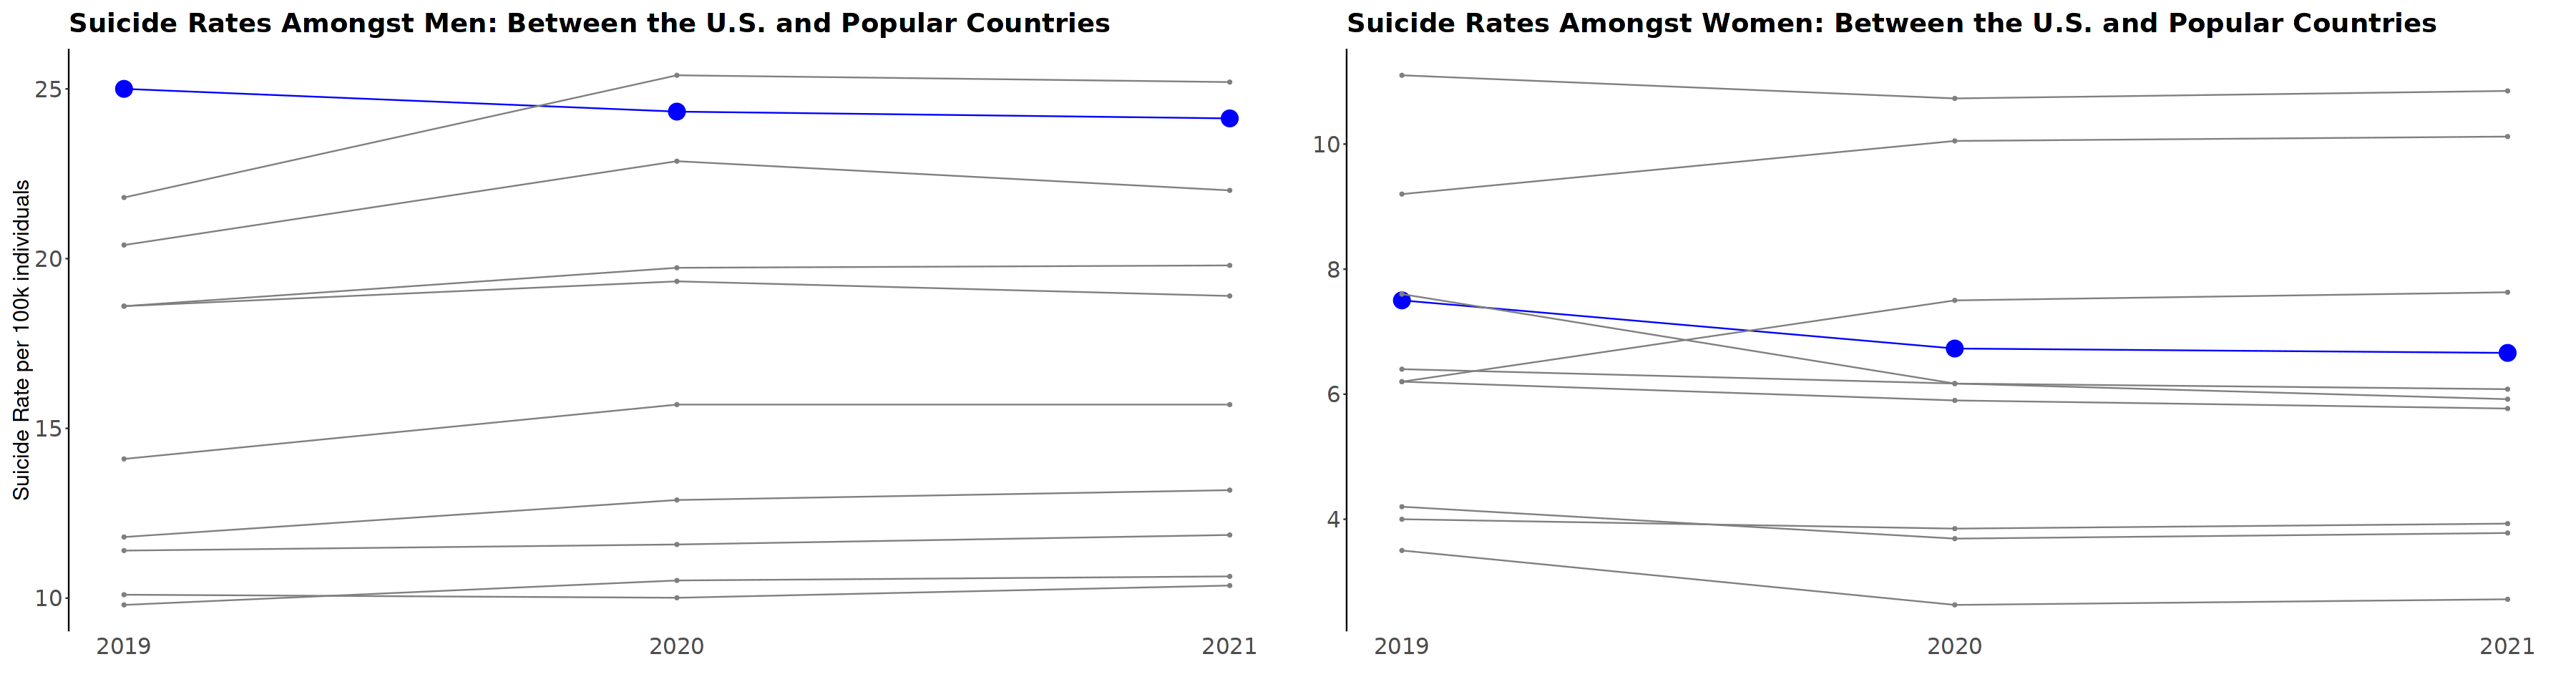

In [13]:
fig_size(30,8)
men_us_lines | women_us_lines

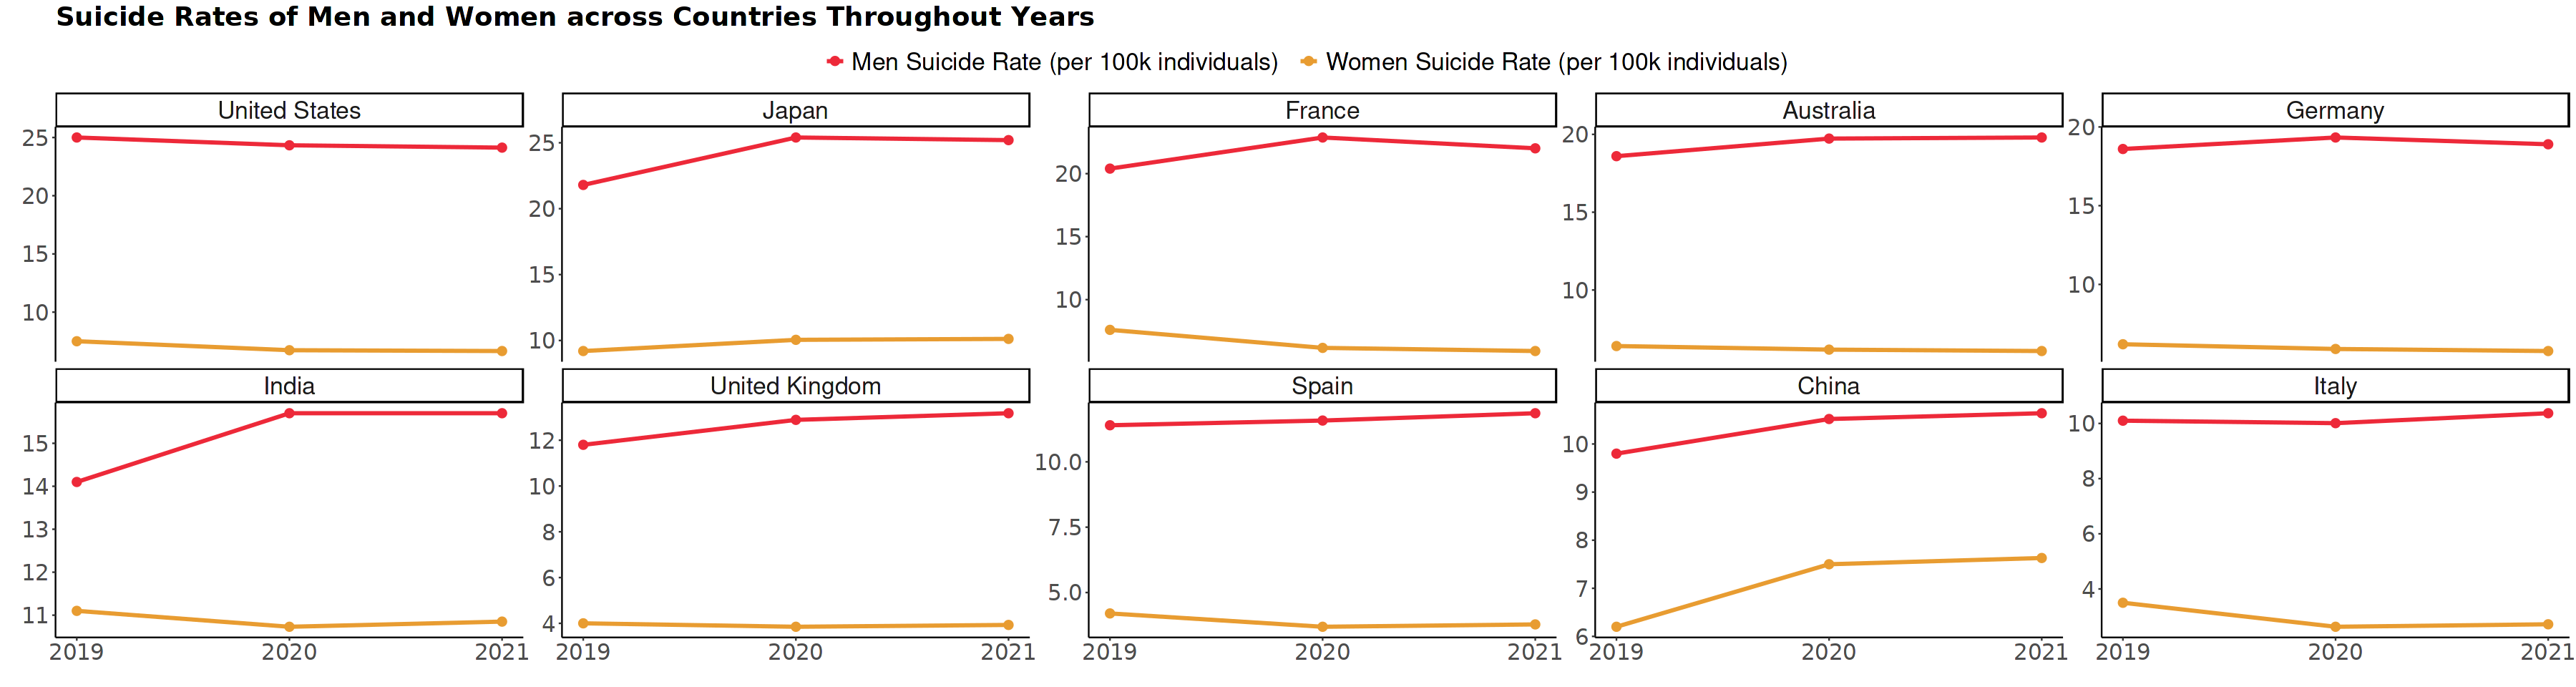

In [14]:
country_levels <- c("United States", "Japan", "France", "Australia", "Germany",
                    "India", "United Kingdom", "Spain", "China", "Italy")
suicide_levels <- c("Men Suicide Rate (per 100k individuals)   ", "Women Suicide Rate (per 100k individuals)   ")


lines_chart <-
    topCountries_data %>%
    ## Process data
    filter(feature!="SuicideRate_BothSexes_RatePer100k") %>%
    mutate(country = factor(country, levels=country_levels)) %>%
    mutate(feature = case_when(feature=="SuicideRate_Male_RatePer100k" ~ "Men Suicide Rate (per 100k individuals)   ",
                               feature=="SuicideRate_Female_RatePer100k" ~ "Women Suicide Rate (per 100k individuals)   "
                              )
          ) %>%
    mutate(feature = factor(feature, levels=suicide_levels)) %>%
    ## Graphing
    ggplot(aes(x=year, y=suicide_rate, colour=feature)) +
    geom_point(size=3) +
    geom_line(linewidth=1.25) +
    labs(title="Suicide Rates of Men and Women across Countries Throughout Years", 
         x="",
         y=""
        ) +
    theme_custom + 
    theme(panel.grid.major.y = element_blank(),
          legend.text = element_text(size=20, hjust=0, vjust=.5),
          strip.text = element_text(size=20, vjust=.5)
         ) +
    scale_x_continuous(breaks=c(2019, 2020, 2021)) +
    facet_wrap(~country, scales="free_y", nrow=2) +
    scale_colour_manual(values=c("Women Suicide Rate (per 100k individuals)   "= "#E89C31",
                                 "Men Suicide Rate (per 100k individuals)   "  = "#ED2939")
                       )

lines_chart